**Assignment 2**
A deep learning based Image classification model on 100 scrapped Images (for each category) from amazon for the below categories :

1) Sarees  (women) (100 images)

2) Tshirts (men) (100 images)

3) Shirts (men) (100 images)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,Activation

In [27]:
!pip install pillow

In [34]:
!pip install matplotlib

In [28]:
import sys
from PIL import Image
sys.modules['Image'] = Image

In [29]:
#Initialising CNN
Model=Sequential()
#1st layer
Model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))

#2nd layer
Model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.25))
#Flattening layer
Model.add(Flatten())
#Full connection layer
Model.add(Dense(units=128,activation='relu'))
Model.add(Dense(units=3,activation='softmax'))
#Compliing the CNN
Model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
print(Model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training=train_gen.flow_from_directory('C:/Users/Arjun Rao/Desktop/Training',
                                       target_size=(64,64),batch_size=20,class_mode='categorical')

Found 300 images belonging to 3 classes.


In [31]:
test_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=test_gen.flow_from_directory('C:/Users/Arjun Rao/Desktop/Test',
                                  target_size=(64,64),batch_size=5,class_mode='categorical')

Found 75 images belonging to 3 classes.


In [32]:
History=Model.fit_generator(training,steps_per_epoch=50,epochs=8,validation_data=test,validation_steps=15)

Epoch 1/8
50/50 [==============================] - 67s 1s/step - loss: 1.0730 - accuracy: 0.5590 - val_loss: 0.8178 - val_accuracy: 0.7200
Epoch 2/8
50/50 [==============================] - 71s 1s/step - loss: 0.5351 - accuracy: 0.7700 - val_loss: 0.1888 - val_accuracy: 0.6533
Epoch 3/8
50/50 [==============================] - 67s 1s/step - loss: 0.4308 - accuracy: 0.8130 - val_loss: 0.5641 - val_accuracy: 0.8000
Epoch 4/8
50/50 [==============================] - 68s 1s/step - loss: 0.3440 - accuracy: 0.8640 - val_loss: 1.0082 - val_accuracy: 0.8133
Epoch 5/8
50/50 [==============================] - 68s 1s/step - loss: 0.2652 - accuracy: 0.8920 - val_loss: 0.1527 - val_accuracy: 0.8400
Epoch 6/8
50/50 [==============================] - 68s 1s/step - loss: 0.2287 - accuracy: 0.9000 - val_loss: 0.2155 - val_accuracy: 0.9200
Epoch 7/8
50/50 [==============================] - 68s 1s/step - loss: 0.1615 - accuracy: 0.9400 - val_loss: 0.2941 - val_accuracy: 0.9067
Epoch 8/8
50/50 [==========

In [43]:
Model.save('Classifier')

**Loss Plot**

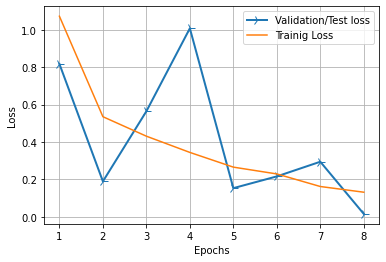

In [37]:
import matplotlib.pyplot as plt

history_dict=History.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values, label='Validation/Test loss')
line2=plt.plot(epochs,loss_values,label='Trainig Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line1,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

**Accuracy Plot**

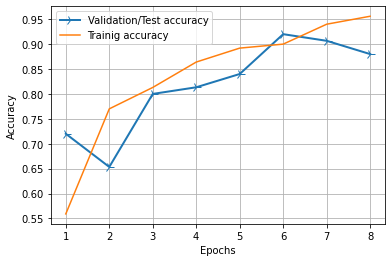

In [39]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values, label='Validation/Test accuracy')
line2=plt.plot(epochs,acc_values,label='Trainig accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line1,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [51]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('C:/Users/Arjun Rao/Desktop/sa.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=Model.predict(test_image)
training.class_indices
if result[0][0]==1:
    prediction="Saree"
elif result[0][1]==1:
    prediction="Shirt"
else:
    prediction="T-shirt"
print(prediction)    

Saree


**Predictions are right by the model 